In [3]:
########### Quasi Monte Carlo Importance Sampling Estimate ##############

import numpy as np
import scipy.stats as stats
import scipy.stats.qmc as qmc

# Initialise target distribution - t-3 distribution
def targetDistribution(x):
    # Degrees of freedom 3
    # Scale is 1
    # Location is 0
    return stats.t.pdf(x, 3, 0, 1)

# Initialise proposal distribution - t-1 distribution
def proposalDistribution(x):
    # Degrees of freedom 1
    # Scale is 1
    # Location is 0
    return stats.t.pdf(x, 1, 0, 1)

def importance_sampler_qmc(num_samples):
    sampler = qmc.Sobol(d=1, scramble=True)
    samples_qmc = sampler.random_base2(m=10)
    
    # Transform quasi-random samples to the target distribution (Student's t-1)
    samples_t1 = stats.t.ppf(samples_qmc, 1)

    weights = targetDistribution(samples_t1) / proposalDistribution(samples_t1)

    normalized_weights = weights / np.sum(weights)
    return samples_t1, normalized_weights

# Number of samples to generate
num_samples = 1024

sample_qmc, normalized_weights_qmc = importance_sampler_qmc(num_samples)

estimate_mean_qmc = np.sum(normalized_weights_qmc * sample_qmc)

print("Quasi-Monte Carlo Estimated value of the target distribution:", estimate_mean_qmc)




Quasi-Monte Carlo Estimated value of the target distribution: -6.594896566382291e-07


In [4]:
############# Importance Sampling estimate ##################

# Target distribution - t-3 distribution
def target_distribution(x):
    # Degrees of freedom 3
    # Scale is 1
    # Location is 0
    return stats.t.pdf(x, 3, 0, 1)

# Proposal distribution - t-1 distribution
def proposal_distribution(x):
    # Degrees of freedom 1
    # Scale is 1
    # Location is 0
    return stats.t.pdf(x, 1, 0, 1)

def importance_sampler(num_samples):
    samples = np.random.standard_t(1, size=num_samples)  # Proposal distribution samples

    weights = target_distribution(samples) / proposal_distribution(samples)

    normalized_weights = weights / np.sum(weights)
    return samples, normalized_weights

# Number of samples to generate
num_samples = 1024

# Perform importance sampling
samples, normalized_weights = importance_sampler(num_samples)

# Compute the estimate of the mean using importance sampling
estimate_mean = np.sum(normalized_weights * samples)

print("Importance Sampling Estimated Mean:", estimate_mean)



Importance Sampling Estimated Mean: -0.006721334231868548


In [23]:
sampler = qmc.Sobol(d=2, scramble=False)
samples_qmc = sampler.random_base2(m=9)


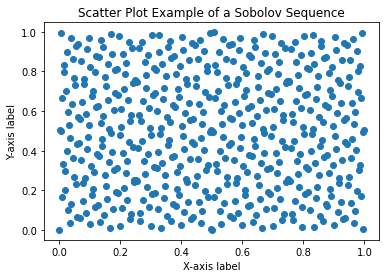

In [24]:
import matplotlib.pyplot as plt

# Sample data for the scatter plot
x_values = samples_qmc[:,0]
y_values = samples_qmc[:,1]

# Plot the scatter plot
plt.scatter(x_values, y_values)

# Add labels and title
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter Plot Example of a Sobolov Sequence')

# Show the plot
plt.show()

In [29]:
unif_random=np.random.uniform(low=0.0, high=1.0, size=(512,2))

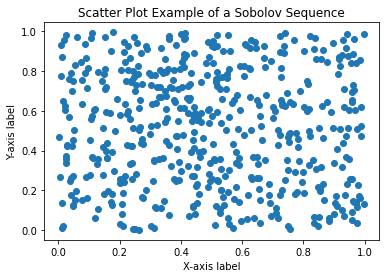

In [30]:
import matplotlib.pyplot as plt

# Sample data for the scatter plot
x_values = unif_random[:,0]
y_values = unif_random[:,1]

# Plot the scatter plot
plt.scatter(x_values, y_values)

# Add labels and title
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter Plot Example of a 2d Uniform Sequence')

# Show the plot
plt.show()